# CENG 483 THE 2

**Name:** Andaç Berkay Seval

**Student ID:** 2235521

In [1]:
# Import libraries
import numpy as np
import cv2
import time
import matplotlib.pyplot as plt
import scipy.signal

In [2]:
# Read all images
chessboard_BGR = cv2.imread('chessboard.png') # BGR image
chessboard = cv2.cvtColor(chessboard_BGR, cv2.COLOR_BGR2RGB) # RGB image
chessboard_rotated_BGR = cv2.imread('chessboard-rotated.png') # BGR image
chessboard_rotated = cv2.cvtColor(chessboard_rotated_BGR, cv2.COLOR_BGR2RGB) # RGB image
lab_BGR = cv2.imread('lab.png') # BGR image
lab = cv2.cvtColor(lab_BGR, cv2.COLOR_BGR2RGB) # RGB image
lab_rotated_BGR = cv2.imread('lab-rotated.png') # BGR image
lab_rotated = cv2.cvtColor(lab_rotated_BGR, cv2.COLOR_BGR2RGB) # RGB image
tree_BGR = cv2.imread('tree.png') # BGR image
tree = cv2.cvtColor(tree_BGR, cv2.COLOR_BGR2RGB) # RGB image
tree_rotated_BGR = cv2.imread('tree-rotated.png') # BGR image
tree_rotated = cv2.cvtColor(tree_rotated_BGR, cv2.COLOR_BGR2RGB) # RGB image

## Naive Formula + Uniform Weighting (without Non-Maximum Suppression)

Time to process chessboard is 2.498 seconds
Time to process chessboard rotated is 2.478 seconds
Time to process lab is 2.413 seconds
Time to process lab rotated is 2.381 seconds
Time to process tree is 2.383 seconds
Time to process tree rotated is 2.393 seconds


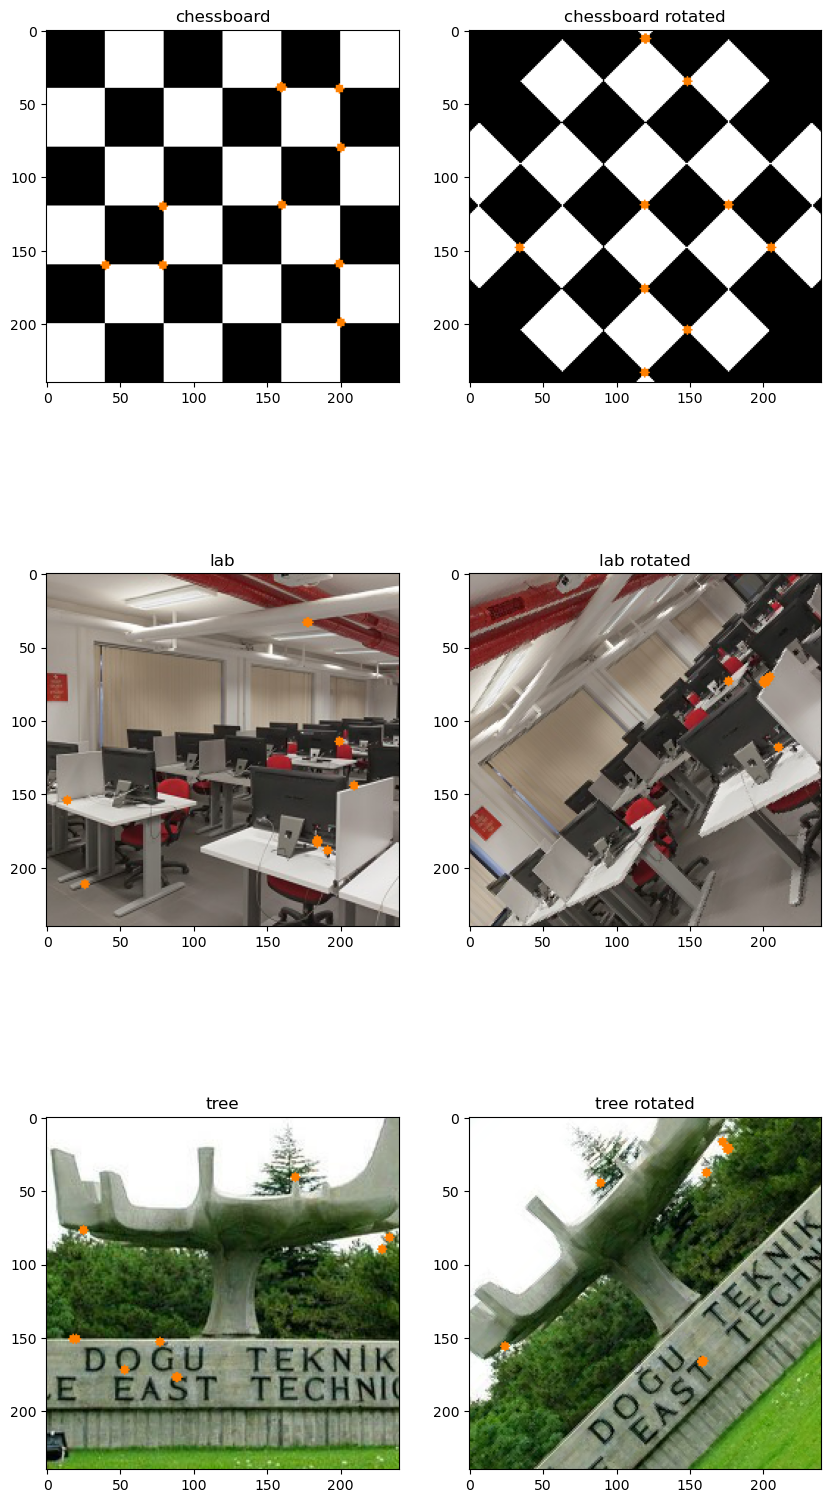

In [5]:
def naive_uniform_woutNMS(image):
    img_RGB = image.copy() # copy RGB image
    img = cv2.cvtColor(img_RGB, cv2.COLOR_RGB2GRAY) # turn into gray scale image
    E = np.zeros(img.shape) # E(u,v), SSD error values
    for i in range(2, img.shape[0] - 2):
        for j in range(2, img.shape[1] - 2):
            window = img[i - 1:i + 2, j - 1:j + 2] # window for the actual point centered in i, j 
            for u in range(-1, 2): # for all 8 directions, check the difference between shifted window and original window 
                for v in range(-1, 2): # left, right, bottom, up, upper-left diagonal, upper-right diagonal, lower-left diagonal, lower-right diagonal
                    if u == 0 and v == 0: # original window - original window difference = 0
                        continue
                    window_shifted = img[i - 1 + u:i + 2 + u, j - 1 + v:j + 2 + v]
                    squared_diff = np.square(window_shifted - window) # squared difference of shifted window and original window
                    E[i, j] += np.sum(squared_diff) # sum of squared difference
                    
    flatten_max_indices = np.argpartition(E.flatten(), -10)[-10:] # partition flattened E values to obtain max 10 elements's indices
    x_indexes, y_indexes = np.unravel_index(flatten_max_indices, E.shape) # obtain original indexes of the max elements in the original shape of E
    for i in range(len(x_indexes)): # draw circles for the max 10 elements of E on the original image 
        cv2.circle(img_RGB, (y_indexes[i], x_indexes[i]), 3, (255, 128, 0), -1)
    return img_RGB  

fig, axs = plt.subplots(3, 2, figsize=(10,20))
start = time.time()
image = naive_uniform_woutNMS(chessboard)
end = time.time()
axs[0, 0].imshow(image)
axs[0, 0].set_title("chessboard")
print("Time to process chessboard is %.3f seconds" % (end - start))
start = time.time()
image = naive_uniform_woutNMS(chessboard_rotated)
end = time.time()
axs[0, 1].imshow(image)
axs[0, 1].set_title("chessboard rotated")
print("Time to process chessboard rotated is %.3f seconds" % (end - start)) 
start = time.time()
image = naive_uniform_woutNMS(lab)
end = time.time()
axs[1, 0].imshow(image)
axs[1, 0].set_title("lab")
print("Time to process lab is %.3f seconds" % (end - start))
start = time.time()
image = naive_uniform_woutNMS(lab_rotated)
end = time.time()
axs[1, 1].imshow(image)
axs[1, 1].set_title("lab rotated")
print("Time to process lab rotated is %.3f seconds" % (end - start))
start = time.time()
image = naive_uniform_woutNMS(tree)
end = time.time()
axs[2, 0].imshow(image)
axs[2, 0].set_title("tree")
print("Time to process tree is %.3f seconds" % (end - start))
start = time.time()
image = naive_uniform_woutNMS(tree_rotated)
end = time.time()
axs[2, 1].imshow(image)
axs[2, 1].set_title("tree rotated")
print("Time to process tree rotated is %.3f seconds" % (end - start))

### Naive Formula + Uniform Weighting (without Non-Maximum Suppression) Discussion

In this task, naive formula with uniform weighting is implemented without non-maximum suppression. Thus, sum of squared difference errors are computed between the shifted windows and the original windows for the corresponding images in all 8 directions. Since non-maximum suppression is not implemented, detected corners seem to be close to each other. Hence, in the images, although top 10 points are detected, due to the closeness of those points, it seems less than 10 points are detected. When I checked the E values I realized that there are more than 10 points which have the same E values. Even if some points are detected both in the original image and rotated image, for generally speaking, this algorithm is not rotation invariant. Average time to process one image is less than the non-maximum suppression counterpart and Taylor's approximation algorithm, but it is more than fast implementations except the RGB split variation. 

## Naive Formula + Uniform Weighting

Time to process chessboard is 3.386 seconds
Time to process chessboard rotated is 3.430 seconds
Time to process lab is 3.763 seconds
Time to process lab rotated is 3.726 seconds
Time to process tree is 3.819 seconds
Time to process tree rotated is 3.717 seconds


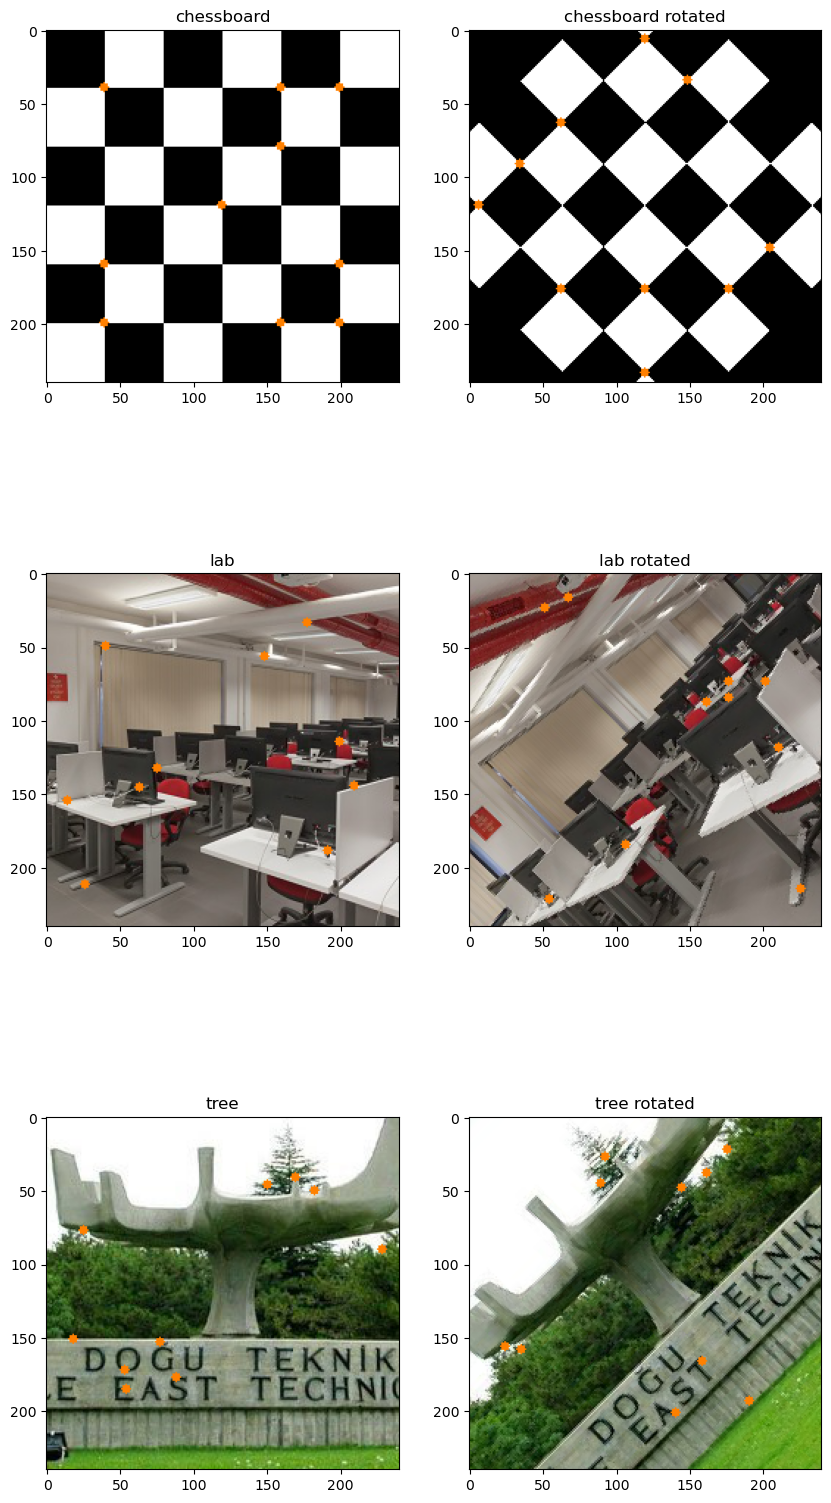

In [6]:
def naive_uniform(image):
    img_RGB = image.copy() # copy RGB image
    img = cv2.cvtColor(img_RGB, cv2.COLOR_RGB2GRAY) # turn into gray scale image
    E = np.zeros(img.shape) # E(u,v), SSD error values
    for i in range(2, img.shape[0] - 2):
        for j in range(2, img.shape[1] - 2):
            window = img[i - 1:i + 2, j - 1:j + 2] # window for the actual point centered in i, j 
            for u in range(-1, 2): # for all 8 directions, check the difference between shifted window and original window
                for v in range(-1, 2):
                    if u == 0 and v == 0:
                        continue
                    window_shifted = img[i - 1 + u:i + 2 + u, j - 1 + v:j + 2 + v] 
                    squared_diff = np.square(window_shifted - window) # squared difference of shifted window and original window
                    E[i, j] += np.sum(squared_diff) # sum of squared difference
        
    for i in range(E.shape[0] - 9): # apply non-maximum suppression with the 10x10 windows 
        for j in range(E.shape[1] - 9):
            local_maximum = np.max(E[i:i + 10, j:j + 10]) # find max element in the window
            local_x = 0
            local_y = 0
            first = True # flag to indicate the first appearance of the max element in the window
            for x in range(10):
                for y in range(10):
                    if first: # to assure the first appearance of the max element
                        if E[i + x, j + y] == local_maximum: # if the element in the window is equal to max element
                            local_x = i + x # take x coordinate of the max element
                            local_y = j + y # take y coordinate of the max element
                            first = False # change the flag since it will no longer be the first appearance
                    E[i + x, j + y] = 0 # set all elements to 0
            E[local_x, local_y] = local_maximum # just the first max element remains        
    
    flatten_max_indices = np.argpartition(E.flatten(), -10)[-10:] # partition flattened E values to obtain max 10 elements's indices
    x_indexes, y_indexes = np.unravel_index(flatten_max_indices, E.shape) # obtain original indexes of the max elements in the original shape of E
    for i in range(len(x_indexes)): # draw circles for the max 10 elements of E on the original image 
        cv2.circle(img_RGB, (y_indexes[i], x_indexes[i]), 3, (255, 128, 0), -1)
    return img_RGB  

fig, axs = plt.subplots(3, 2, figsize=(10,20))
start = time.time()
image = naive_uniform(chessboard)
end = time.time()
axs[0, 0].imshow(image)
axs[0, 0].set_title("chessboard")
print("Time to process chessboard is %.3f seconds" % (end - start))
start = time.time()
image = naive_uniform(chessboard_rotated)
end = time.time()
axs[0, 1].imshow(image)
axs[0, 1].set_title("chessboard rotated")
print("Time to process chessboard rotated is %.3f seconds" % (end - start)) 
start = time.time()
image = naive_uniform(lab)
end = time.time()
axs[1, 0].imshow(image)
axs[1, 0].set_title("lab")
print("Time to process lab is %.3f seconds" % (end - start))
start = time.time()
image = naive_uniform(lab_rotated)
end = time.time()
axs[1, 1].imshow(image)
axs[1, 1].set_title("lab rotated")
print("Time to process lab rotated is %.3f seconds" % (end - start))
start = time.time()
image = naive_uniform(tree)
end = time.time()
axs[2, 0].imshow(image)
axs[2, 0].set_title("tree")
print("Time to process tree is %.3f seconds" % (end - start))
start = time.time()
image = naive_uniform(tree_rotated)
end = time.time()
axs[2, 1].imshow(image)
axs[2, 1].set_title("tree rotated")
print("Time to process tree rotated is %.3f seconds" % (end - start))

### Naive Formula + Uniform Weighting Discussion

In this task, naive formula + uniform weighting is implemented with non-maximum suppression. Non-maximum suppression is implemented as 10x10 windows over the image. In each window, first maximum element of the window is kept but other elements are set to 0. Therefore, this algorithm detects points in distinct places rather than close ones. Just like without non-maximum suppression counterpart, some points are detected both in the original image and rotated image. However overall, this algorithm is not rotation invariant too. Generally, detected points are different in original and rotated image. Average time to process one image is less than Taylor's approximation. Nevertheless, it is more than without non-maximum suppression counterpart and fast implementations.  

## Taylor's Approximation + Uniform Weighting

Time to process chessboard is 3.889 seconds
Time to process chessboard rotated is 3.976 seconds
Time to process lab is 4.258 seconds
Time to process lab rotated is 4.291 seconds
Time to process tree is 4.220 seconds
Time to process tree rotated is 4.239 seconds


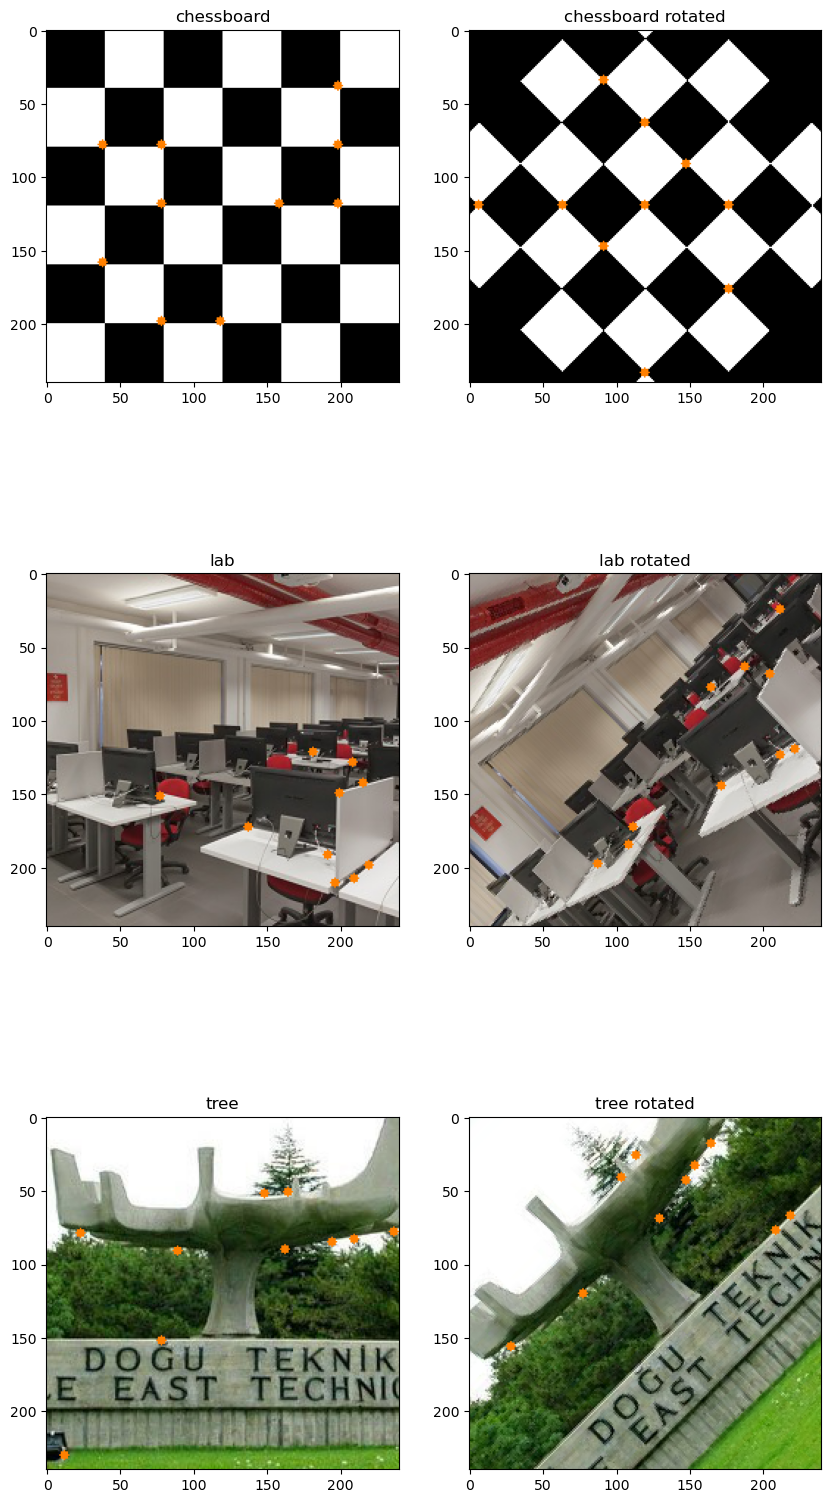

In [8]:
def taylor_series_app(image):
    img_RGB = image.copy() # copy RGB image
    img = cv2.cvtColor(img_RGB, cv2.COLOR_RGB2GRAY) # turn into gray scale image
    E = np.zeros(img.shape) # E(u,v), SSD error values
    Ix = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3, scale=1, borderType=cv2.BORDER_REPLICATE) # convolve image with the SobelX filter to obtain X gradients of the image
    Iy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3, scale=1, borderType=cv2.BORDER_REPLICATE) # convolve image with the SobelY filter to obtain Y gradients of the image
    Ix_square = np.square(Ix) 
    Iy_square = np.square(Iy) 
    Ix_Iy = Ix * Iy 
    for i in range(2, img.shape[0] - 2):
        for j in range(2, img.shape[1] - 2):
            window_Ix2 = Ix_square[i - 2:i + 3, j - 2:j + 3] 
            window_Iy2 = Iy_square[i - 2:i + 3, j - 2:j + 3]
            window_Ix_Iy = Ix_Iy[i - 2:i + 3, j - 2:j + 3]
            H = np.array([[np.sum(window_Ix2), np.sum(window_Ix_Iy)], [np.sum(window_Ix_Iy), np.sum(window_Iy2)]]) # create H matrix for the corresponding window 
            for u in range(-1, 2):
                for v in range(-1, 2):
                    if u == 0 and v == 0:
                        continue
                    E[i, j] += np.matmul(np.matmul(np.array([u, v]), H), np.array([[u], [v]]))[0]
            
    for i in range(E.shape[0] - 9): # apply non-maximum suppression with the 10x10 windows 
        for j in range(E.shape[1] - 9):
            local_maximum = np.max(E[i:i+10, j:j+10])
            local_x = 0
            local_y = 0
            first = True
            for x in range(10):
                for y in range(10):
                    if first:
                        if E[i + x, j + y] == local_maximum:
                            local_x = i + x
                            local_y = j + y
                            first = False
                    E[i + x, j + y] = 0
            E[local_x, local_y] = local_maximum 
            
    flatten_max_indices = np.argpartition(E.flatten(), -10)[-10:] # obtain top 10 max elements's indices
    x_indexes, y_indexes = np.unravel_index(flatten_max_indices, E.shape)
    for i in range(len(x_indexes)): 
        cv2.circle(img_RGB, (y_indexes[i], x_indexes[i]), 3, (255, 128, 0), -1)
    return img_RGB  

fig, axs = plt.subplots(3, 2, figsize=(10,20))
start = time.time()
image = taylor_series_app(chessboard)
end = time.time()
axs[0, 0].imshow(image)
axs[0, 0].set_title("chessboard")
print("Time to process chessboard is %.3f seconds" % (end - start))
start = time.time()
image = taylor_series_app(chessboard_rotated)
end = time.time()
axs[0, 1].imshow(image)
axs[0, 1].set_title("chessboard rotated")
print("Time to process chessboard rotated is %.3f seconds" % (end - start)) 
start = time.time()
image = taylor_series_app(lab)
end = time.time()
axs[1, 0].imshow(image)
axs[1, 0].set_title("lab")
print("Time to process lab is %.3f seconds" % (end - start))
start = time.time()
image = taylor_series_app(lab_rotated)
end = time.time()
axs[1, 1].imshow(image)
axs[1, 1].set_title("lab rotated")
print("Time to process lab rotated is %.3f seconds" % (end - start))
start = time.time()
image = taylor_series_app(tree)
end = time.time()
axs[2, 0].imshow(image)
axs[2, 0].set_title("tree")
print("Time to process tree is %.3f seconds" % (end - start))
start = time.time()
image = taylor_series_app(tree_rotated)
end = time.time()
axs[2, 1].imshow(image)
axs[2, 1].set_title("tree rotated")
print("Time to process tree rotated is %.3f seconds" % (end - start))              

### Taylor's Approximation + Uniform Weighting Discussion

In this task, Taylor series approximation with uniform weighting is implemented. Since images are convolved with Sobel operators while creating H matrices window by window, average process time of one image is increased in this algorithm. Hence, computation time is longer than any other variation. Number of points that are detected both in the original image and rotated image is increased in this algorithm. However, it is still rotation variant. 

## Fast Implementation + Uniform Weighting

Time to process chessboard is 0.889 seconds
Time to process chessboard rotated is 0.934 seconds
Time to process lab is 1.289 seconds
Time to process lab rotated is 1.339 seconds
Time to process tree is 1.297 seconds
Time to process tree rotated is 1.319 seconds


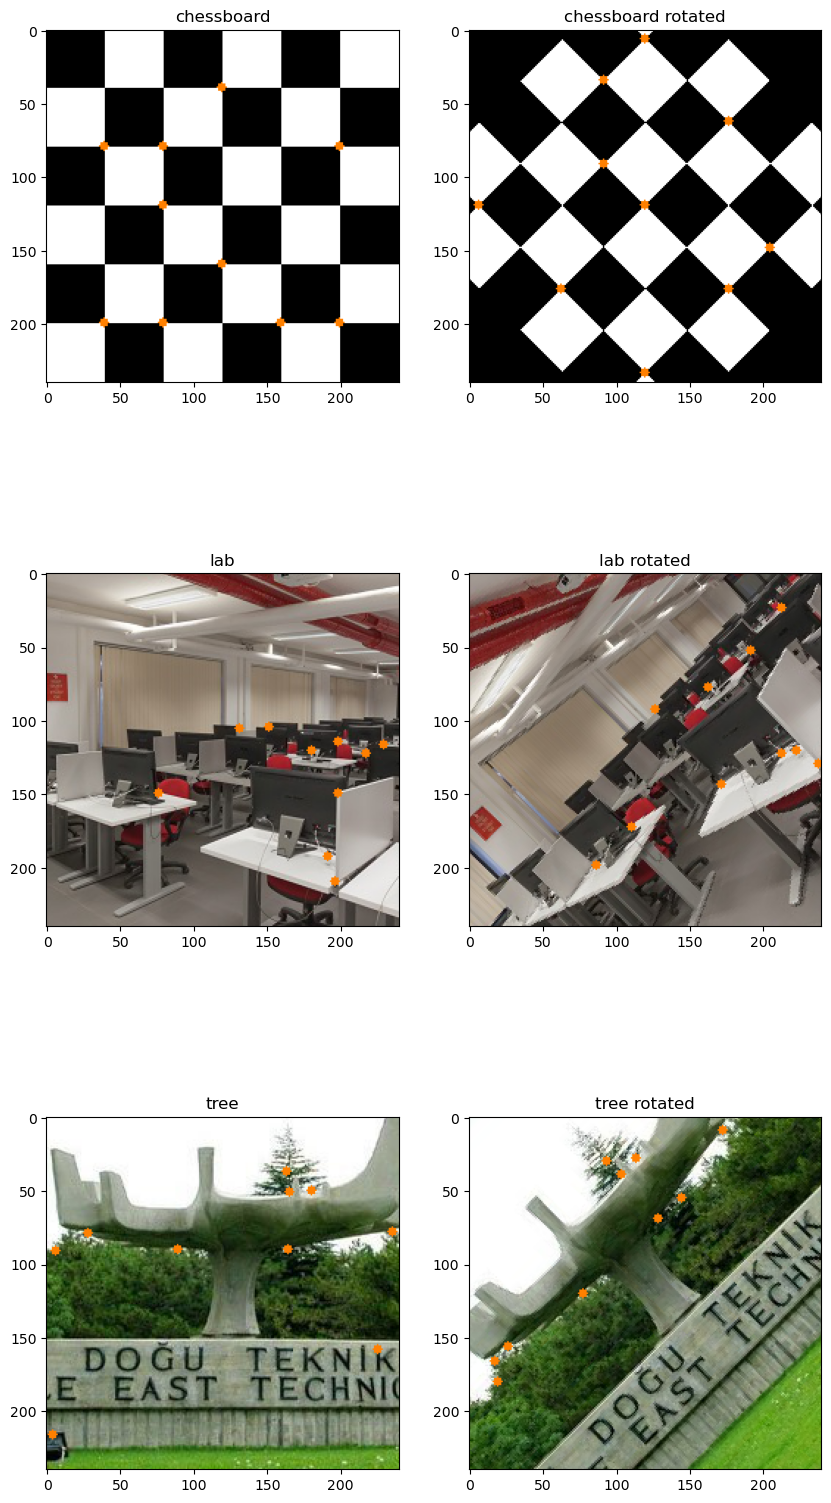

In [9]:
def fast_uniform(image):
    img_RGB = image.copy() # copy RGB image
    img = cv2.cvtColor(img_RGB, cv2.COLOR_RGB2GRAY) # turn into gray scale image
    uniform = np.ones((3, 3)) # create uniform filter
    Ix = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3, scale=1, borderType=cv2.BORDER_REPLICATE) # convolve image with the SobelX filter to obtain X gradients of the image
    Iy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3, scale=1, borderType=cv2.BORDER_REPLICATE) # convolve image with the SobelY filter to obtain Y gradients of the image  
    Ix_square = np.square(Ix)
    Iy_square = np.square(Iy)
    Ix_Iy = Ix * Iy   
    Ix2_convolved = scipy.signal.convolve2d(Ix_square, uniform, mode='same', boundary='symm') # convolve Ix*Ix with the uniform filter
    Iy2_convolved = scipy.signal.convolve2d(Iy_square, uniform, mode='same', boundary='symm') # convolve Iy*Iy with the uniform filter
    IxIy_convolved = scipy.signal.convolve2d(Ix_Iy, uniform, mode='same', boundary='symm') # convolve Ix*Iy with the uniform filter
    determinant = Ix2_convolved * Iy2_convolved - IxIy_convolved * IxIy_convolved # determinant of second moment matrix
    trace = Ix2_convolved + Iy2_convolved # trace of second moment matrix
    E = determinant - 0.04 * trace**2 # corner response function
               
    for i in range(E.shape[0] - 9): # apply non-maximum suppression with the 10x10 windows 
        for j in range(E.shape[1] - 9):
            local_maximum = np.max(E[i:i+10, j:j+10])
            local_x = 0
            local_y = 0
            first = True
            for x in range(10):
                for y in range(10):
                    if first:
                        if E[i + x, j + y] == local_maximum:
                            local_x = i + x
                            local_y = j + y
                            first = False
                    E[i + x, j + y] = 0
            E[local_x, local_y] = local_maximum 
            
    flatten_max_indices = np.argpartition(E.flatten(), -10)[-10:] # obtain top 10 max elements's indices
    x_indexes, y_indexes = np.unravel_index(flatten_max_indices, E.shape)
    for i in range(len(x_indexes)):
        cv2.circle(img_RGB, (y_indexes[i], x_indexes[i]), 3, (255, 128, 0), -1)
    return img_RGB  

fig, axs = plt.subplots(3, 2, figsize=(10,20))
start = time.time()
image = fast_uniform(chessboard)
end = time.time()
axs[0, 0].imshow(image)
axs[0, 0].set_title("chessboard")
print("Time to process chessboard is %.3f seconds" % (end - start))
start = time.time()
image = fast_uniform(chessboard_rotated)
end = time.time()
axs[0, 1].imshow(image)
axs[0, 1].set_title("chessboard rotated")
print("Time to process chessboard rotated is %.3f seconds" % (end - start)) 
start = time.time()
image = fast_uniform(lab)
end = time.time()
axs[1, 0].imshow(image)
axs[1, 0].set_title("lab")
print("Time to process lab is %.3f seconds" % (end - start))
start = time.time()
image = fast_uniform(lab_rotated)
end = time.time()
axs[1, 1].imshow(image)
axs[1, 1].set_title("lab rotated")
print("Time to process lab rotated is %.3f seconds" % (end - start))
start = time.time()
image = fast_uniform(tree)
end = time.time()
axs[2, 0].imshow(image)
axs[2, 0].set_title("tree")
print("Time to process tree is %.3f seconds" % (end - start))
start = time.time()
image = fast_uniform(tree_rotated)
end = time.time()
axs[2, 1].imshow(image)
axs[2, 1].set_title("tree rotated")
print("Time to process tree rotated is %.3f seconds" % (end - start))

### Fast Implementation + Uniform Weighting Discussion

In this task, fast implementation with uniform weighting is implemented. Corner response function is computed for an image as a whole. After finding Ix * Ix, Ix * Iy and Iy * Iy by convoling image with the Sobel filters, they are convolved with the uniform filter as a window effect. Since cornerness function is computed from the whole image rather than window by window, this algorithm runs fast. Hence, average process time of one image is decreased. Thus, computation time is less than naive formula with and without non-maximum suppression and Taylor's approximation. Computation time of the fast implementations are similar except the RGB split. Number of same detected points is increased especially in the tree images but still not rotation-invariant.

## Fast Implementation + Circular Weighting

Time to process chessboard is 0.900 seconds
Time to process chessboard rotated is 0.919 seconds
Time to process lab is 1.290 seconds
Time to process lab rotated is 1.319 seconds
Time to process tree is 1.304 seconds
Time to process tree rotated is 1.327 seconds


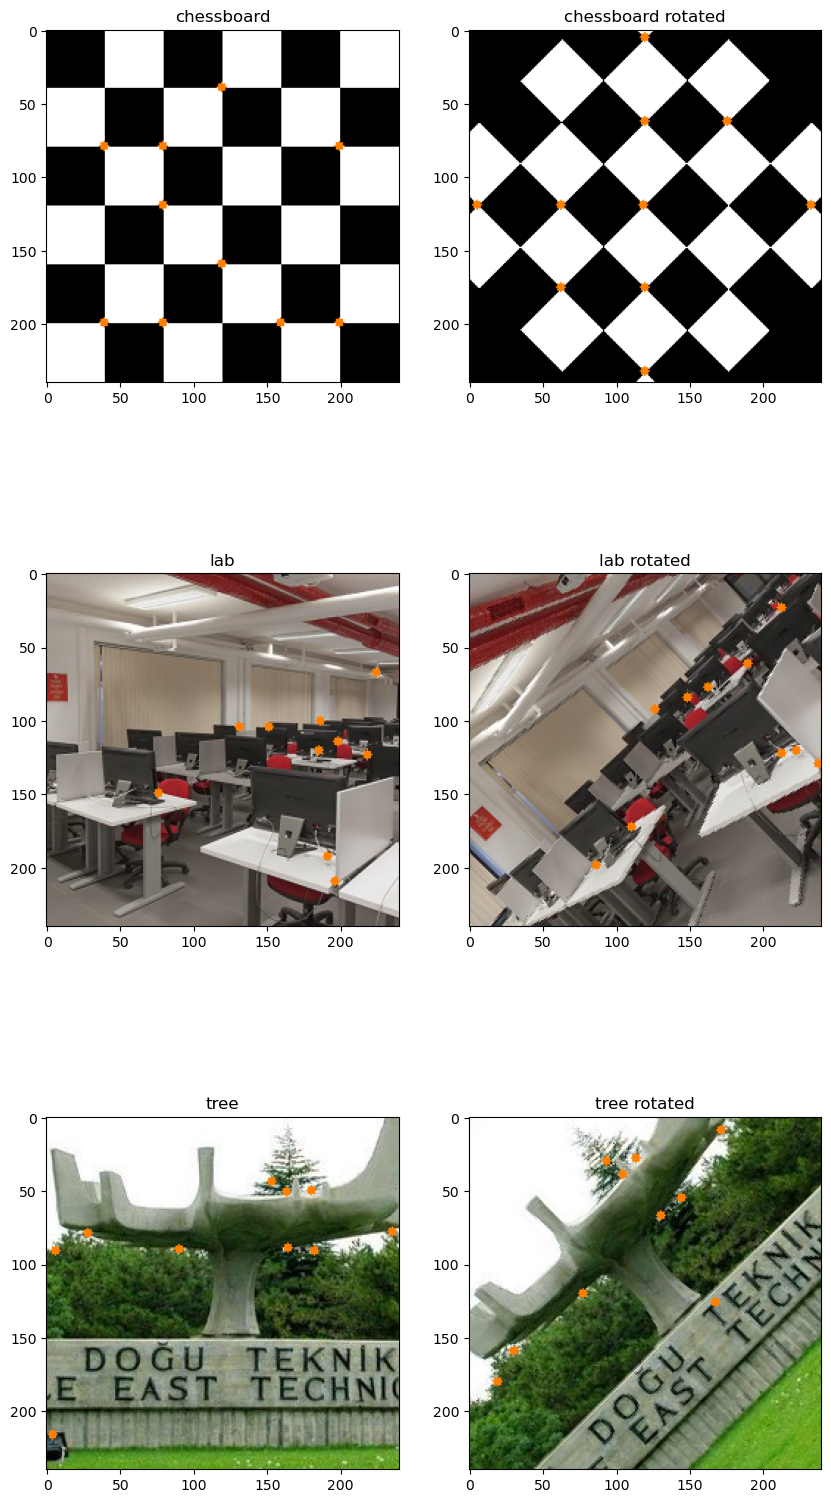

In [10]:
def fast_circular(image):
    img_RGB = image.copy() # copy RGB image
    img = cv2.cvtColor(img_RGB, cv2.COLOR_RGB2GRAY) # turn into gray scale image
    circular = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]) # create circular filter    
    Ix = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3, scale=1, borderType=cv2.BORDER_REPLICATE)
    Iy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3, scale=1, borderType=cv2.BORDER_REPLICATE)    
    Ix_square = np.square(Ix)
    Iy_square = np.square(Iy)
    Ix_Iy = Ix * Iy   
    Ix2_convolved = scipy.signal.convolve2d(Ix_square, circular, mode='same', boundary='symm')
    Iy2_convolved = scipy.signal.convolve2d(Iy_square, circular, mode='same', boundary='symm')
    IxIy_convolved = scipy.signal.convolve2d(Ix_Iy, circular, mode='same', boundary='symm')
    determinant = Ix2_convolved * Iy2_convolved - IxIy_convolved * IxIy_convolved # determinant of second moment matrix
    trace = Ix2_convolved + Iy2_convolved # trace of second moment matrix
    E = determinant - 0.04 * trace**2 # corner response function
    
    for i in range(E.shape[0] - 9): # apply non-maximum suppression with the 10x10 windows 
        for j in range(E.shape[1] - 9):
            local_maximum = np.max(E[i:i+10, j:j+10])
            local_x = 0
            local_y = 0
            first = True
            for x in range(10):
                for y in range(10):
                    if first:
                        if E[i + x, j + y] == local_maximum:
                            local_x = i + x
                            local_y = j + y
                            first = False
                    E[i + x, j + y] = 0
            E[local_x, local_y] = local_maximum
            
    flatten_max_indices = np.argpartition(E.flatten(), -10)[-10:] # obtain top 10 max elements's indices
    x_indexes, y_indexes = np.unravel_index(flatten_max_indices, E.shape)
    for i in range(len(x_indexes)):
        cv2.circle(img_RGB, (y_indexes[i], x_indexes[i]), 3, (255, 128, 0), -1)
    return img_RGB  

fig, axs = plt.subplots(3, 2, figsize=(10,20))
start = time.time()
image = fast_circular(chessboard)
end = time.time()
axs[0, 0].imshow(image)
axs[0, 0].set_title("chessboard")
print("Time to process chessboard is %.3f seconds" % (end - start))
start = time.time()
image = fast_circular(chessboard_rotated)
end = time.time()
axs[0, 1].imshow(image)
axs[0, 1].set_title("chessboard rotated")
print("Time to process chessboard rotated is %.3f seconds" % (end - start)) 
start = time.time()
image = fast_circular(lab)
end = time.time()
axs[1, 0].imshow(image)
axs[1, 0].set_title("lab")
print("Time to process lab is %.3f seconds" % (end - start))
start = time.time()
image = fast_circular(lab_rotated)
end = time.time()
axs[1, 1].imshow(image)
axs[1, 1].set_title("lab rotated")
print("Time to process lab rotated is %.3f seconds" % (end - start))
start = time.time()
image = fast_circular(tree)
end = time.time()
axs[2, 0].imshow(image)
axs[2, 0].set_title("tree")
print("Time to process tree is %.3f seconds" % (end - start))
start = time.time()
image = fast_circular(tree_rotated)
end = time.time()
axs[2, 1].imshow(image)
axs[2, 1].set_title("tree rotated")
print("Time to process tree rotated is %.3f seconds" % (end - start))

### Fast Implementation + Circular Weighting Discussion

In this task, fast implementation with circular weighting is implemented. This algorithm is nearly same as the uniform weighting counterpart. The only difference is that instead of convolving Ix * Ix, Ix * Iy, Iy * Iy with uniform filter, circular filter is used in convolution. As discussed in the task 4, average time to process one image in the fast implementations is close to each other. This is a fast algorithm. Hence, computation time is less than naive formula and Taylor's approximation. Also, point detection performance is similar to uniform weighting counterpart. However, it is still rotation variant. 

## Fast Implementation + Gaussian Weighting

Time to process chessboard is 0.911 seconds
Time to process chessboard rotated is 0.914 seconds
Time to process lab is 1.275 seconds
Time to process lab rotated is 1.327 seconds
Time to process tree is 1.312 seconds
Time to process tree rotated is 1.311 seconds


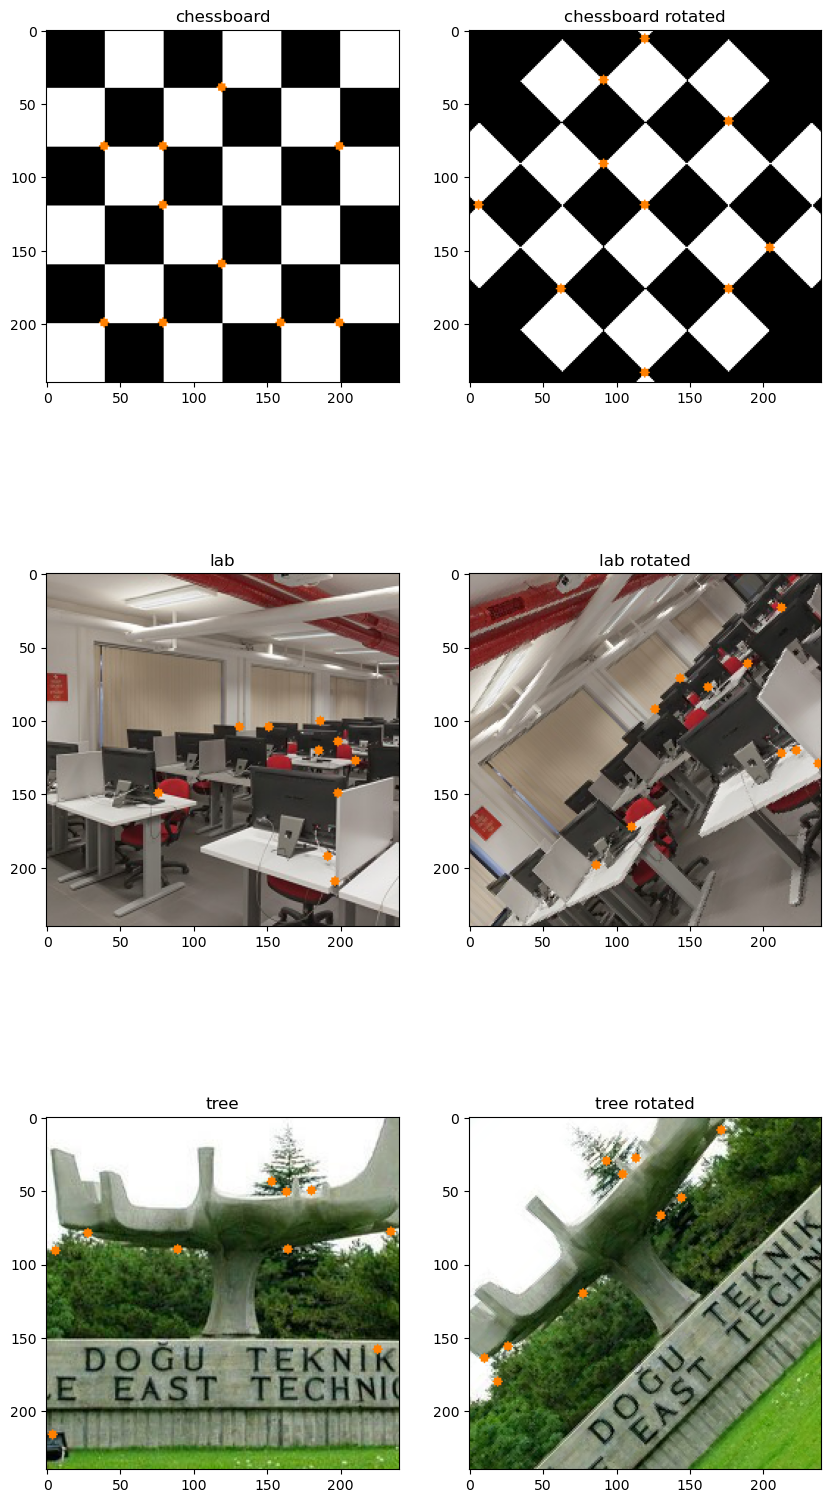

In [11]:
def fast_gaussian(image):
    img_RGB = image.copy() # copy RGB image
    img = cv2.cvtColor(img_RGB, cv2.COLOR_RGB2GRAY) # turn into gray scale image
    Ix = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3, scale=1, borderType=cv2.BORDER_REPLICATE) # convolve image with the SobelX filter to obtain X gradients of the image
    Iy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3, scale=1, borderType=cv2.BORDER_REPLICATE) # convolve image with the SobelY filter to obtain Y gradients of the image
    Ix_square = np.square(Ix)
    Iy_square = np.square(Iy)
    Ix_Iy = Ix * Iy   
    Ix2_convolved = cv2.GaussianBlur(Ix_square, (3, 3), 0, borderType=cv2.BORDER_REPLICATE) # convolve Ix*Ix with gaussian filter
    Iy2_convolved = cv2.GaussianBlur(Iy_square, (3, 3), 0, borderType=cv2.BORDER_REPLICATE) # convolve Iy*Iy with gaussian filter
    IxIy_convolved = cv2.GaussianBlur(Ix_Iy, (3, 3), 0, borderType=cv2.BORDER_REPLICATE) # convolve Ix*Iy with gaussian filter
    determinant = Ix2_convolved * Iy2_convolved - IxIy_convolved * IxIy_convolved # determinant of second moment matrix
    trace = Ix2_convolved + Iy2_convolved # trace of second moment matrix
    E = determinant - 0.04 * trace**2 # corner response function
    
    for i in range(E.shape[0] - 9): # apply non-maximum suppression with the 10x10 windows 
        for j in range(E.shape[1] - 9):
            local_maximum = np.max(E[i:i+10, j:j+10])
            local_x = 0
            local_y = 0
            first = True
            for x in range(10):
                for y in range(10):
                    if first:
                        if E[i + x, j + y] == local_maximum:
                            local_x = i + x
                            local_y = j + y
                            first = False
                    E[i + x, j + y] = 0
            E[local_x, local_y] = local_maximum
               
    flatten_max_indices = np.argpartition(E.flatten(), -10)[-10:] # obtain top 10 max elements's indices
    x_indexes, y_indexes = np.unravel_index(flatten_max_indices, E.shape)
    for i in range(len(x_indexes)):
        cv2.circle(img_RGB, (y_indexes[i], x_indexes[i]), 3, (255, 128, 0), -1)
    return img_RGB  

fig, axs = plt.subplots(3, 2, figsize=(10,20))
start = time.time()
image = fast_gaussian(chessboard)
end = time.time()
axs[0, 0].imshow(image)
axs[0, 0].set_title("chessboard")
print("Time to process chessboard is %.3f seconds" % (end - start))
start = time.time()
image = fast_gaussian(chessboard_rotated)
end = time.time()
axs[0, 1].imshow(image)
axs[0, 1].set_title("chessboard rotated")
print("Time to process chessboard rotated is %.3f seconds" % (end - start)) 
start = time.time()
image = fast_gaussian(lab)
end = time.time()
axs[1, 0].imshow(image)
axs[1, 0].set_title("lab")
print("Time to process lab is %.3f seconds" % (end - start))
start = time.time()
image = fast_gaussian(lab_rotated)
end = time.time()
axs[1, 1].imshow(image)
axs[1, 1].set_title("lab rotated")
print("Time to process lab rotated is %.3f seconds" % (end - start))
start = time.time()
image = fast_gaussian(tree)
end = time.time()
axs[2, 0].imshow(image)
axs[2, 0].set_title("tree")
print("Time to process tree is %.3f seconds" % (end - start))
start = time.time()
image = fast_gaussian(tree_rotated)
end = time.time()
axs[2, 1].imshow(image)
axs[2, 1].set_title("tree rotated")
print("Time to process tree rotated is %.3f seconds" % (end - start))


### Fast Implementation + Gaussian Weighting Discussion

In this part, fast implementation with gaussian weighting is implemented. This algorithm is very similar to uniform and circular weighting counterparts. The only difference is instead of convolving Ix * Ix, Ix * Iy, Iy * Iy with uniform or circular filters, gaussian filter is used in convolution. Average time to process one image is similar to other fast implementations and less than naive formula and Taylor's approximation. In theory, results are rotation invariant in this version of Harris Corner Detector. However, probably, in order to obtain a perfect match, some parameters need to be tuned such as border choice of the image in convolution (zero padding, edge replicating etc.), sigma value in gaussian filter, size of the filter, non-maximum suppression window size and total number of maximum points to be detected. Other than that, performance of the algorithm is good for rotation invariant point detection.

## Fast Implementation + Gaussian Weighting + RGB Split

Time to process chessboard is 2.421 seconds
Time to process chessboard rotated is 2.457 seconds
Time to process lab is 3.615 seconds
Time to process lab rotated is 3.679 seconds
Time to process tree is 3.595 seconds
Time to process tree rotated is 3.678 seconds


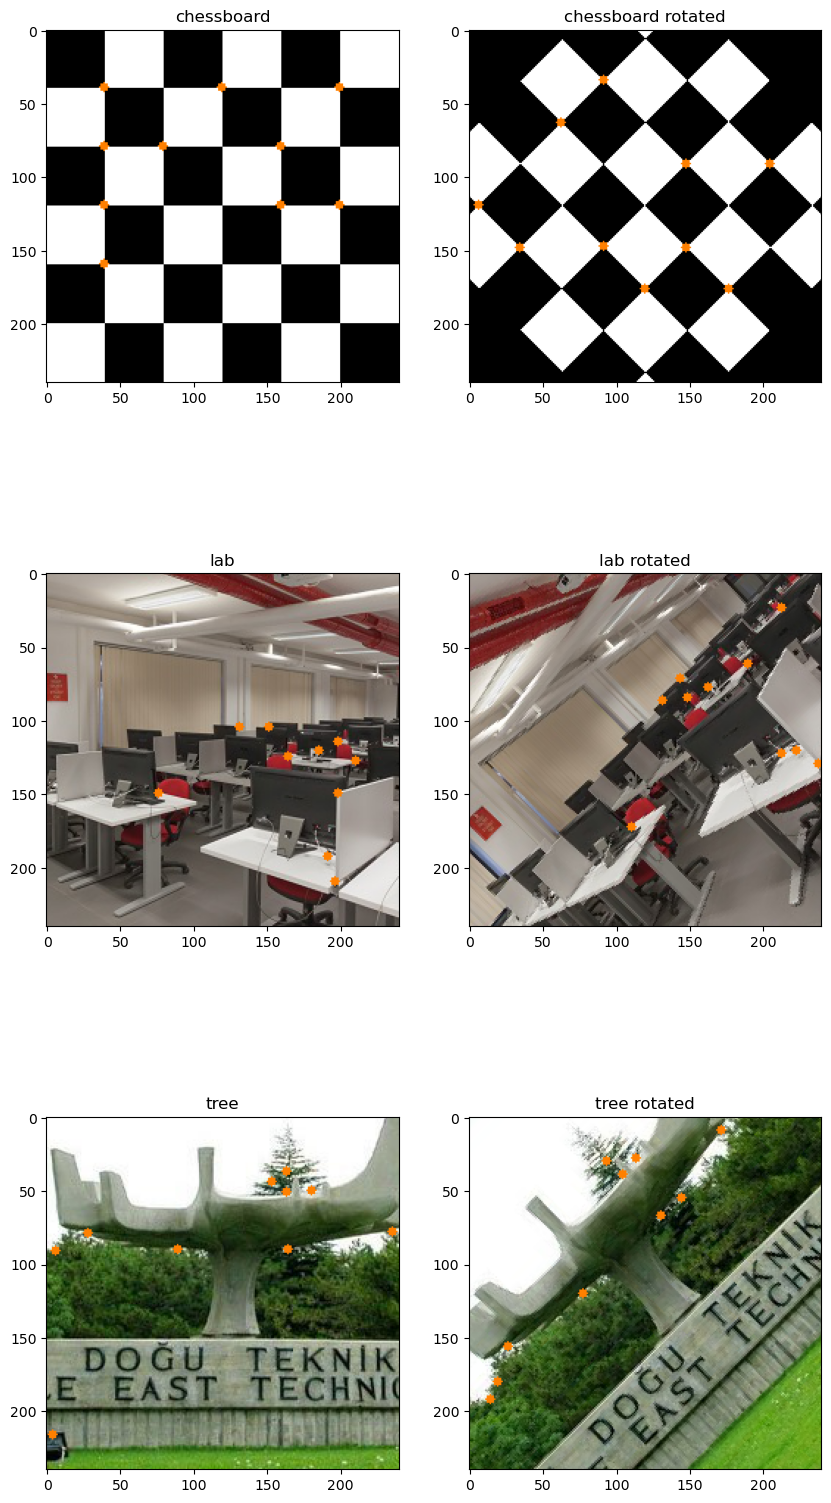

In [4]:
def fast_gaussian_rgb(image):
    img_RGB = image.copy() # copy RGB image
    Red = img_RGB[:,:,0] # red channel 
    Green = img_RGB[:,:,1] # green channel
    Blue = img_RGB[:,:,2] # blue channel
    IxR = cv2.Sobel(Red, cv2.CV_64F, 1, 0, ksize=3, scale=1, borderType=cv2.BORDER_REPLICATE) # convolve red channel with the SobelX filter to obtain X gradients
    IyR = cv2.Sobel(Red, cv2.CV_64F, 0, 1, ksize=3, scale=1, borderType=cv2.BORDER_REPLICATE) # convolve red channel with the SobelY filter to obtain Y gradients
    IxR_square = np.square(IxR)
    IyR_square = np.square(IyR)
    Ix_IyR = IxR * IyR
    IxG = cv2.Sobel(Green, cv2.CV_64F, 1, 0, ksize=3, scale=1, borderType=cv2.BORDER_REPLICATE) # convolve green channel with the SobelX filter to obtain X gradients
    IyG = cv2.Sobel(Green, cv2.CV_64F, 0, 1, ksize=3, scale=1, borderType=cv2.BORDER_REPLICATE) # convolve green channel with the SobelY filter to obtain Y gradients
    IxG_square = np.square(IxG)
    IyG_square = np.square(IyG)
    Ix_IyG = IxG * IyG
    IxB = cv2.Sobel(Blue, cv2.CV_64F, 1, 0, ksize=3, scale=1, borderType=cv2.BORDER_REPLICATE) # convolve blue channel with the SobelX filter to obtain X gradients
    IyB = cv2.Sobel(Blue, cv2.CV_64F, 0, 1, ksize=3, scale=1, borderType=cv2.BORDER_REPLICATE) # convolve blue channel with the SobelY filter to obtain Y gradients
    IxB_square = np.square(IxB)
    IyB_square = np.square(IyB)
    Ix_IyB = IxB * IyB    
    Ix2_convolvedR = cv2.GaussianBlur(IxR_square, (3, 3), 0, borderType=cv2.BORDER_REPLICATE) # convolve IxR*IxR with gaussian filter
    Iy2_convolvedR = cv2.GaussianBlur(IyR_square, (3, 3), 0, borderType=cv2.BORDER_REPLICATE) # convolve IyR*IyR with gaussian filter
    IxIy_convolvedR = cv2.GaussianBlur(Ix_IyR, (3, 3), 0, borderType=cv2.BORDER_REPLICATE) # convolve IxR*IyR with gaussian filter
    Ix2_convolvedG = cv2.GaussianBlur(IxG_square, (3, 3), 0, borderType=cv2.BORDER_REPLICATE) # convolve IxG*IxG with gaussian filter
    Iy2_convolvedG = cv2.GaussianBlur(IyG_square, (3, 3), 0, borderType=cv2.BORDER_REPLICATE) # convolve IyG*IyG with gaussian filter
    IxIy_convolvedG = cv2.GaussianBlur(Ix_IyG, (3, 3), 0, borderType=cv2.BORDER_REPLICATE) # convolve IxG*IyG with gaussian filter
    Ix2_convolvedB = cv2.GaussianBlur(IxB_square, (3, 3), 0, borderType=cv2.BORDER_REPLICATE) # convolve IxB*IxB with gaussian filter
    Iy2_convolvedB = cv2.GaussianBlur(IyB_square, (3, 3), 0, borderType=cv2.BORDER_REPLICATE) # convolve IyB*IyB with gaussian filter
    IxIy_convolvedB = cv2.GaussianBlur(Ix_IyB, (3, 3), 0, borderType=cv2.BORDER_REPLICATE) # convolve IxB*IyB with gaussian filter
    determinantR = Ix2_convolvedR * Iy2_convolvedR - IxIy_convolvedR * IxIy_convolvedR # determinant of second moment matrix of red channel
    traceR = Ix2_convolvedR + Iy2_convolvedR # trace of second moment matrix of red channel
    ER = determinantR - 0.04 * traceR**2 # corner response function of red channel
    determinantG = Ix2_convolvedG * Iy2_convolvedG - IxIy_convolvedG * IxIy_convolvedG # determinant of second moment matrix of green channel
    traceG = Ix2_convolvedG + Iy2_convolvedG # trace of second moment matrix of red channel
    EG = determinantG - 0.04 * traceG**2 # corner response function of green channel
    determinantB = Ix2_convolvedB * Iy2_convolvedB - IxIy_convolvedB * IxIy_convolvedB # determinant of second moment matrix of blue channel
    traceB = Ix2_convolvedB + Iy2_convolvedB # trace of second moment matrix of red channel
    EB = determinantB - 0.04 * traceB**2 # corner response function of blue channel           

    for i in range(ER.shape[0] - 9): # apply non-maximum suppression with the 10x10 windows for all channels together
        for j in range(ER.shape[1] - 9):
            local_maximumR = np.max(ER[i:i + 10, j:j + 10]) # maximum element in the window of ER
            local_maximumG = np.max(EG[i:i + 10, j:j + 10]) # maximum element in the window of EG
            local_maximumB = np.max(EB[i:i + 10, j:j + 10]) # maximum element in the window of EB
            local_maximum = max(local_maximumR, local_maximumG, local_maximumB) # maximum element in the window among all channels
            local_x = 0
            local_y = 0
            color = ""
            first = True # flag to indicate first appearance of the maximum value
            for x in range(10):
                for y in range(10):
                    if first:
                        if ER[i + x, j + y] == local_maximum:
                            local_x = i + x
                            local_y = j + y
                            color = "Red"
                            first = False
                        elif EG[i + x, j + y] == local_maximum:
                            local_x = i + x
                            local_y = j + y
                            color = "Green"
                            first = False
                        elif EB[i + x, j + y] == local_maximum:
                            local_x = i + x
                            local_y = j + y
                            color = "Blue"
                            first = False
                    ER[i + x, j + y] = 0
                    EG[i + x, j + y] = 0
                    EB[i + x, j + y] = 0
            if color == "Red":
                ER[local_x, local_y] = local_maximum
            elif color == "Green":
                EG[local_x, local_y] = local_maximum
            elif color == "Blue":
                EB[local_x, local_y] = local_maximum
    
    E = np.zeros(img_RGB.shape) # create general E consists of ER, EG and EB
    E[:, :, 0] = ER
    E[:, :, 1] = EG
    E[:, :, 2] = EB
  
    flatten_max_indices = np.argpartition(E.flatten(), -10)[-10:] # obtain top 10 max elements's indices
    x_indexes, y_indexes, z_indexes = np.unravel_index(flatten_max_indices, E.shape)
    for i in range(len(x_indexes)):
        cv2.circle(img_RGB, (y_indexes[i], x_indexes[i]), 3, (255, 128, 0), -1)
    return img_RGB  

fig, axs = plt.subplots(3, 2, figsize=(10,20))
start = time.time()
image = fast_gaussian_rgb(chessboard)
end = time.time()
axs[0, 0].imshow(image)
axs[0, 0].set_title("chessboard")
print("Time to process chessboard is %.3f seconds" % (end - start))
start = time.time()
image = fast_gaussian_rgb(chessboard_rotated)
end = time.time()
axs[0, 1].imshow(image)
axs[0, 1].set_title("chessboard rotated")
print("Time to process chessboard rotated is %.3f seconds" % (end - start)) 
start = time.time()
image = fast_gaussian_rgb(lab)
end = time.time()
axs[1, 0].imshow(image)
axs[1, 0].set_title("lab")
print("Time to process lab is %.3f seconds" % (end - start))
start = time.time()
image = fast_gaussian_rgb(lab_rotated)
end = time.time()
axs[1, 1].imshow(image)
axs[1, 1].set_title("lab rotated")
print("Time to process lab rotated is %.3f seconds" % (end - start))
start = time.time()
image = fast_gaussian_rgb(tree)
end = time.time()
axs[2, 0].imshow(image)
axs[2, 0].set_title("tree")
print("Time to process tree is %.3f seconds" % (end - start))
start = time.time()
image = fast_gaussian_rgb(tree_rotated)
end = time.time()
axs[2, 1].imshow(image)
axs[2, 1].set_title("tree rotated")
print("Time to process tree rotated is %.3f seconds" % (end - start))

### Fast Implementation + Gaussian Weighting + RGB Split Discussion

In this task, fast implementation + gaussian weighting is implemented with RGB split. The algorithm uses the same logic as without RGB split counterpart. Instead of working with the gray scale image, original image splitted to red, green and blue channels and each channel is used separately for computing corner response function. However, non-maximum suppression and top 10 point selection parts run among all channels. Therefore, in non-maximum suppression implementation, instead of a 2D window iteration over an image, each channel is included in the window. Hence, first maximum point is kept in the window and all other points are set to 0 among all channels. Since all channels are processed in the algorithm, average time to process one image is more than other fast implementations and naive formula without non-maximum suppression, but less than the naive formula with non-maximum suppression and Taylor's approximation. Moreover, performance of the algorithm is very similar to without RGB split counterpart. 

# Conclusion

To begin with, there are some design choices that I made for the implementations. First one is about non-maximum suppression implementation. In non-maximum suppression implementation, I used 10x10 windows over the image. Also, if there are more than 1 maximum element in the window, I kept the first appearance of the maximum, set every other point to 0. Second one is about convolutions. I used OpenCV library as much as I can for the convolutions to have consistency. Hence, in convolutions, I used edge replication borders for the image in order to prevent detecting points in the boundary edge of the image. I used Scipy library for convolving with custom filters like uniform and circular filter. Overall, fast implementation algorithm's performance is better than naive formula with/without non-maximum suppression and Taylor's approximation for both detecting nearly same points in original and rotated images and computation time. Thus, all fast implementation algorithms give similar results. However, in theory, fast implementation with gaussian weighting gives rotation invariant result, a perfect match between images. Furthermore, as I discussed in the Fast Implementation + Gaussian Weighting discussion, some parameters need to be tuned in order to have a perfect match most likely. Sigma value in the gaussian filter, filter size, choice of border of image in convolution, non-maximum suppression window size and total number of maximum points to be detected could be changed to have better results. To conclude, I choose Fast Implementation + Gaussian Weighting variation since it gives a good performance for detecting points in original images and rotated images and it is a fast algorithm similar to other fast implementations. As far as I can see, RGB split is not necessary since it gives a similar result for point detection but runs slower.  